In [ ]:
#IMPORTING ALL THE NEEDFUL LIBRARIES

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# READING THE DATSAET
df=pd.read_csv("/content/Training Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#CHECKNG THE NULL AND DTYPE OF THE DATASET
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# TO GET STATISTICAL KNOWLEDGE OF THE DATASET 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#TO COPY THE DATASET FO WE CAN ALWAYS HAVE THE REAL DATASET SAFE.
ndf=df.copy()
ndf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#THIS FEATURE IS NOT MUCH USEFUL SO I REMOVED IT.
ndf.drop("Loan_ID",inplace=True,axis=1)

In [ ]:
ndf["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# fillinf the null values in the loan amount and loan amount term feature
ndf['LoanAmount'].fillna(ndf.LoanAmount.mean(), inplace=True)
ndf["Loan_Amount_Term"].fillna(ndf.Loan_Amount_Term.mean(), inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
#filling the null values in the Credit_Histroy Feature which is the most important feature so when i checked the dataset i observed that most of the people having loan_satus as yes have the credit _history so i did this.
ndf["Credit_History"].loc[((ndf["Credit_History"].isnull()) & (ndf["Loan_Status"]=="Y"))]=1.0

ndf["Credit_History"].loc[((ndf["Credit_History"].isnull()) & (ndf["Loan_Status"]=="N"))]=0.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# to check whether my previos is properly done or not
ndf.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [ ]:
# next we move to self_employed null values
ndf["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
# i checked for the relativity of this with the education feature  but the fact was there more of the people were not self _employed therefore i kept all of them with as not self _employed
ndf["Self_Employed"].fillna("No",inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
#the most data more than 56% has dependents 0 therefore i kept it 0.
ndf["Dependents"].fillna(0,inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
#since Gender and married were the two features which had only 3 and 13 null values respectively i drop that rows.
ndf.dropna(axis=0,inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 60.7+ KB


## Q1)Ratio of Male To Female

In [ ]:
print(ndf["Gender"].value_counts())

Male      487
Female    111
Name: Gender, dtype: int64


# *Therefore the ratio of male to female  is 487:111*

# *Q2)How many male are married and not married?*

In [ ]:
#the number of males are 487 therefore
m=457
mm=ndf[(ndf["Gender"]=="Male" )& (ndf["Married"]=="Yes")]
mm.shape

(357, 12)

In [ ]:
print("the number of males who are married :" + str(mm.shape[0])+ "   the number of  males who are not married:" + str(m-mm.shape[0]))

the number of males who are married :357   the number of  males who are not married:100


 # *Q3) How many female are married and not married?*

In [ ]:
# the number of females are 111
f=111
mf=ndf[(ndf["Gender"]=="Female" )& (ndf["Married"]=="Yes")]
mf.shape

(31, 12)

In [ ]:
print("the number of females who are married :" + str(mf.shape[0])+ "   the number of  females who are not married:" + str(f-mf.shape[0]))

the number of females who are married :31   the number of  females who are not married:80


 # *Q4)How many males and  females are graduated and non-graduated with respect to their marital status?*

In [ ]:
#m means married, f means female , g means graduated , n means not graduated and u means unmarried 
mfg=ndf[(ndf["Gender"]=="Female" ) & (ndf["Married"]=="Yes") & (ndf["Education"]=="Graduate")]
ufg=ndf[(ndf["Gender"]=="Female" ) & (ndf["Married"]=="No") & (ndf["Education"]=="Graduate")]
mfn=ndf[(ndf["Gender"]=="Female" ) & (ndf["Married"]=="Yes") & (ndf["Education"]=="Not Graduate")]
ufn=ndf[(ndf["Gender"]=="Female" ) & (ndf["Married"]=="No") & (ndf["Education"]=="Not Graduate")]
print("THE MARRIED  GRADUATE FEMALES ARE:" + str(mfg.shape[0]))
print("THE MARRIED NOT-GRADUATE FEMALES ARE:" + str(mfn.shape[0]))
print("THE UNMARRIED  GRADUATE FEMALES ARE:" + str(ufg.shape[0]))
print("THE UNMARRIED NOT-GRADUATE FEMALES ARE:" + str(ufn.shape[0]))

THE MARRIED  GRADUATE FEMALES ARE:25
THE MARRIED NOT-GRADUATE FEMALES ARE:6
THE UNMARRIED  GRADUATE FEMALES ARE:66
THE UNMARRIED NOT-GRADUATE FEMALES ARE:14


In [ ]:
#m means married, M means male , g means graduated , n means not graduated and u means unmarried 
mMg=ndf[(ndf["Gender"]=="Male" ) & (ndf["Married"]=="Yes") & (ndf["Education"]=="Graduate")]
uMg=ndf[(ndf["Gender"]=="Male" ) & (ndf["Married"]=="No") & (ndf["Education"]=="Graduate")]
mMn=ndf[(ndf["Gender"]=="Male" ) & (ndf["Married"]=="Yes") & (ndf["Education"]=="Not Graduate")]
uMn=ndf[(ndf["Gender"]=="Male" ) & (ndf["Married"]=="No") & (ndf["Education"]=="Not Graduate")]
print("THE MARRIED  GRADUATE MALES ARE:" + str(mMg.shape[0]))
print("THE MARRIED NOT-GRADUATE MALES ARE:" + str(mMn.shape[0]))
print("THE UNMARRIED  GRADUATE MALES ARE:" + str(uMg.shape[0]))
print("THE UNMARRIED NOT-GRADUATE MALES ARE:" + str(uMn.shape[0]))

THE MARRIED  GRADUATE MALES ARE:275
THE MARRIED NOT-GRADUATE MALES ARE:82
THE UNMARRIED  GRADUATE MALES ARE:99
THE UNMARRIED NOT-GRADUATE MALES ARE:31


# *Q5)Which type of encoding will be required to perform on the "Education" column?*

# *A)I WILL USE LABEL ENCODER  TO MAKE IT ELGIBLE TO USE FOR CLASSIFICATION.*

# *Q6)IS IT A MALE OR FEMALE WHOSE LOAN AMOUNT IS HIGHEST?*

In [ ]:
x=ndf["LoanAmount"].max()
ndf[ndf["LoanAmount"]==x]["Gender"]

130    Male
Name: Gender, dtype: object

# **HENCE THE PERSON HAVING HIGHEST LOAN AMOUNT IS A MALE**

# *Q7 )SPECIFICATION OF THE PERSON WHO HAS THE HIGHEST INCOME?*

In [ ]:
HIGH=ndf["ApplicantIncome"].max()
ndf[ndf["ApplicantIncome"]==HIGH]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


# *Q8)WHAT ALL FEATURES ARE USED FOR THE MODEL TRAINING AND WHY?*

In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 60.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
end=LabelEncoder()
#ndf["Dependents"].astype("int64")
ndf["Gender"]=end.fit_transform(ndf["Gender"])
ndf["Married"]=end.fit_transform(ndf["Married"])
ndf["Education"]=end.fit_transform(ndf["Education"])
ndf["Self_Employed"]=end.fit_transform(ndf["Self_Employed"])
#ndf["Dependents"]=end.fit_transform(ndf["Dependents"])
ndf["Credit_History"]=end.fit_transform(ndf["Credit_History"])
ndf["Loan_Status"]=end.fit_transform(ndf["Loan_Status"])
ndf["Property_Area"]=end.fit_transform(ndf["Property_Area"])
ndf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


In [ ]:
dd=pd.get_dummies(ndf)

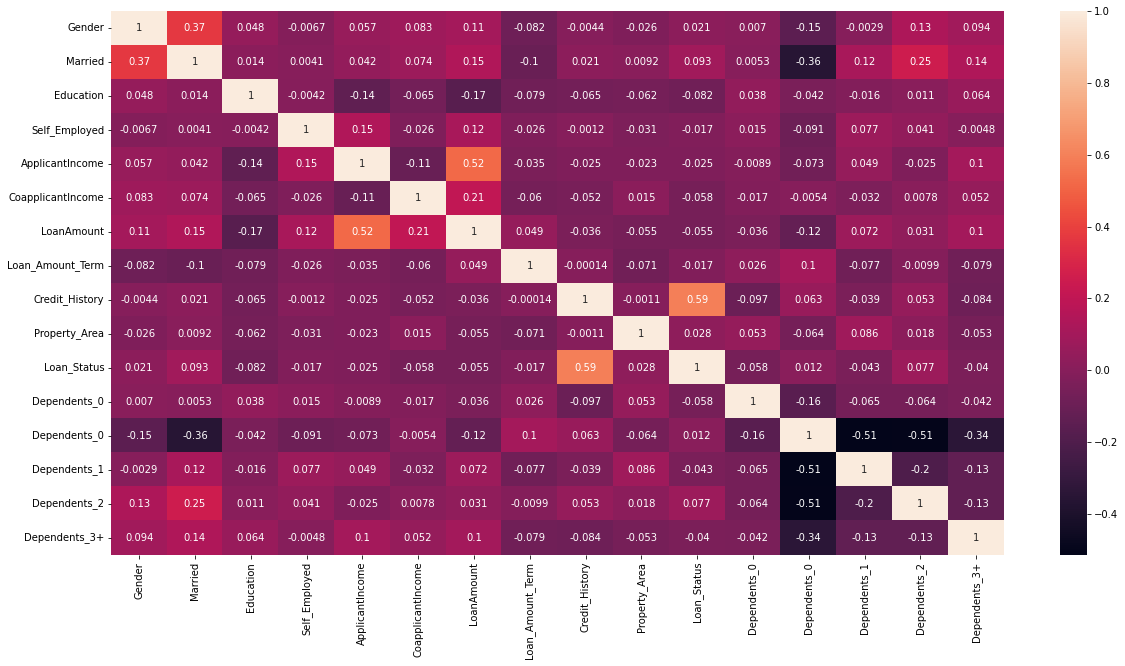

In [ ]:
plt.figure(figsize=(20,10))
hs=sns.heatmap(dd.corr(),annot=True)

# *HERE WE CAN SEE THAT ALL THE SELECTED FEATURES ARE RELATED TO LOAN_STATUS THEREFORE WE USE ALL OF THESE FEATURES.*

# *Q9) WHICH MODEL ARE YOU GOING TO CHOOSE AND DEFINE THE REASON FOR GOING WITH IT?*

# *A) I WILL BE USING DECISION TREE  MODEL TO TRAIN THIS DATASET BECAUSE IT GIVES BETTER  ACCURACY IN TERMS OF CLASSIFICATION THEN OTHERS. I HAVE EXPERIMENTED IT ON SVM TOO *

# *Q 10) HAVE U PERFORMED THE HYPER PARAMTER TUNING?*
# *NO*




## *Q 11) COMPARE THE ACTUAL RESULTS WITH PREDICTED RESULT?*

In [ ]:

YY=dd[["Loan_Status"]]
XX=dd.drop(["Loan_Status"],axis=1)
XX = preprocessing.StandardScaler().fit_transform(XX)#normalise the data to get more accurate results

In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,YY,random_state=4,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as tree
ctree=tree(max_depth=5,min_samples_split=2,random_state=5,ccp_alpha=0.12)
ctree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.12, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [ ]:
preds=ctree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pd.DataFrame(confusion_matrix(Y_test,preds),
index =[["actual","actual"],["YES","NO"]],
       columns=[["pred","pred"],["YES","NO"]]) 

pred    
            YES  NO
actual YES   20  10
       NO     2  88

In [ ]:
classification_report(Y_test,preds)

'              precision    recall  f1-score   support\n\n           0       0.91      0.67      0.77        30\n           1       0.90      0.98      0.94        90\n\n    accuracy                           0.90       120\n   macro avg       0.90      0.82      0.85       120\nweighted avg       0.90      0.90      0.89       120\n'

In [ ]:
accuracy_score(Y_test,preds)



0.9

# *Q12) WHAT'S THE ACCURACY OF YOUR MODEL?*
# *A )90%*

In [ ]:
import pickle
pickle.dump(ctree, open("/content/PROJECT1_PICKLE_FILE", "wb"))
pickle_in = open("/content/PROJECT1_PICKLE_FILE","rb")
unpickling= pickle.load(pickle_in)

In [ ]:
unpickling.predict(X_test)
accuracy_score(Y_test,preds)

0.9

# *Q13) MORE APPROACHES TO IMPORVE THE ACCURACY?*

# *A) WE CAN TRY MANY OTHER COMBINATIONS OF THE  RANDOM STATE,CCP_ALPHA,DEPTH,SPLIT. I IMPORVED MY ACCURACY BYT THAT ONLY FROM 75 TO 88 .ANOTHER THING WE CAN DO IS UNDERSTANDING THE MISSING DATA  MORE CAREFULLY AND MANIPULATING IT.*

#Q14)WHAT CAN YOU CONCLUDE WITH RESPECT TO THE DATA?

# *CONCLUSION:THE DATA HAD MORE MISSING VALUES THAN USUAL THERFORE IT PULL DOWNS THE ACCURACY.*